## Import Data Analytic Packages

In [1]:
#load required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
#load dataset
df=pd.read_csv("Marvel_Movies_Dataset.csv")
df.head()

,Index,Title,Director (1),Director (2),Release Date (DD-MM-YYYY),IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),CinemaScore (grades A+ to F),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $)
0,0,Iron Man,Jon Favreau,NaN,2008-05-02 00:00:00,7.9,79,94,91,3.7,A,140.0,319.0,585.8
1,1,The Incredible Hulk,Louis Leterrier,NaN,2008-06-13 00:00:00,6.6,61,68,69,2.5,A-,150.0,134.8,265.5
2,2,Iron Man 2,Jon Favreau,NaN,2010-05-07 00:00:00,6.9,57,72,71,2.9,A,200.0,312.4,623.9
3,3,Thor,Kenneth Branagh,NaN,2011-05-06 00:00:00,7.0,57,77,76,2.8,B+,150.0,181.0,449.3
4,4,Captain America: The First Avenger,Joe Johnston,NaN,2011-07-22 00:00:00,6.9,66,80,75,3.3,A-,215.0,176.7,370.6


## Quick Overview of Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Index                                            34 non-null     int64  
 1   Title                                            34 non-null     object 
 2   Director (1)                                     34 non-null     object 
 3   Director (2)                                     5 non-null      object 
 4   Release Date (DD-MM-YYYY)                        34 non-null     object 
 5   IMDb (scored out of 10)                          34 non-null     float64
 6   IMDB Metascore (scored out of 100)               34 non-null     int64  
 7   Rotten Tomatoes - Critics (scored out of 100%)   34 non-null     int64  
 8   Rotten Tomatoes - Audience (scored out of 100%)  34 non-null     int64  
 9   Letterboxd (scored out of 5)      

In [4]:
df.describe()

,Index,IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $)
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,16.500000,7.244118,65.970588,80.882353,84.205882,3.235294,229.523529,365.864706,918.564706
std,9.958246,0.692029,8.857407,12.727362,10.446920,0.519255,69.004243,195.486792,556.262323
min,0.000000,5.500000,48.000000,46.000000,45.000000,2.200000,140.000000,84.500000,206.100000
25%,8.250000,6.825000,60.250000,76.250000,78.250000,2.900000,183.750000,215.025000,535.925000
50%,16.500000,7.300000,67.000000,83.500000,86.500000,3.350000,200.000000,333.950000,809.500000
75%,24.750000,7.800000,71.000000,91.000000,91.750000,3.700000,250.000000,422.925000,1149.500000
max,33.000000,8.400000,88.000000,96.000000,98.000000,4.000000,400.000000,858.400000,2799.000000


## Data Cleaning

In [5]:
#check for missing values
df.isnull().sum()

Index                                               0
Title                                               0
Director (1)                                        0
Director (2)                                       29
Release Date (DD-MM-YYYY)                           0
IMDb (scored out of 10)                             0
IMDB Metascore (scored out of 100)                  0
Rotten Tomatoes - Critics (scored out of 100%)      0
Rotten Tomatoes - Audience (scored out of 100%)     0
Letterboxd (scored out of 5)                        0
CinemaScore (grades A+ to F)                        0
Budget (in million $)                               0
Domestic Gross (in million $)                       0
Worldwide Gross (in million $)                      0
dtype: int64

The column `Director 2` appears to have 29 missing values. However, the missing values don't impact the analysis, since they correspond to movies that had only one director. We can proceed with the analysis without any adjustments.

In [6]:
#convert Release Date column to datetime format
df['Release Date (DD-MM-YYYY)']=pd.to_datetime(df['Release Date (DD-MM-YYYY)'])
#double-check the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Index                                            34 non-null     int64         
 1   Title                                            34 non-null     object        
 2   Director (1)                                     34 non-null     object        
 3   Director (2)                                     5 non-null      object        
 4   Release Date (DD-MM-YYYY)                        34 non-null     datetime64[ns]
 5   IMDb (scored out of 10)                          34 non-null     float64       
 6   IMDB Metascore (scored out of 100)               34 non-null     int64         
 7   Rotten Tomatoes - Critics (scored out of 100%)   34 non-null     int64         
 8   Rotten Tomatoes - Audience (scored out of 

## Top 5 Highest Grossing Movies

In [7]:
#sort the data by Worldwide Gross in descending order and select the top 5
highest_grossing=df.sort_values(by='Worldwide Gross (in million $)', ascending=False).head(5)
#print the top 5 highest-grossing movies and their Worldwide Gross
print("\nTop 5 Highest-Grossing Movies:")
print(highest_grossing[['Title', 'Worldwide Gross (in million $)']])



Top 5 Highest-Grossing Movies:
                      Title  Worldwide Gross (in million $)
21        Avengers: Endgame                          2799.0
18   Avengers: Infinity War                          2052.0
26  Spider-Man: No Way Home                          1952.0
5              The Avengers                          1521.0
10  Avengers: Age of Ultron                          1405.0


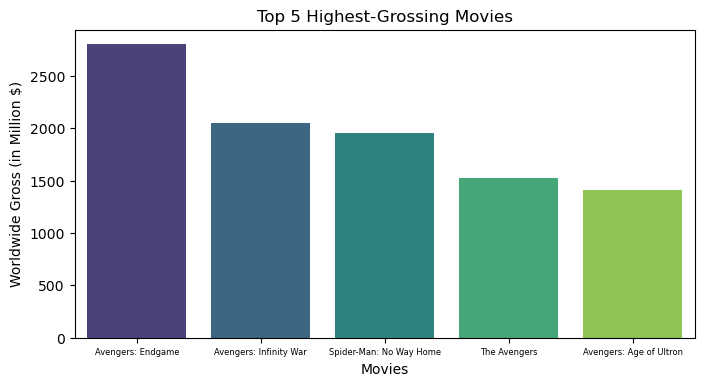

In [8]:
#visualize the top 5 highest grossing MCU movies
#create plot
plt.figure(figsize=(8, 4))
sns.barplot(data=highest_grossing, x='Title', y='Worldwide Gross (in million $)', palette='viridis')
#add title and labels
plt.title('Top 5 Highest-Grossing Movies')
plt.xlabel('Movies')
plt.ylabel('Worldwide Gross (in Million $)')
plt.xticks(fontsize=6)
#show the barplot
plt.show()

## Budget vs. Worldwide Gross

In [9]:
#calculate correlation between budget and worldwide gross
correlation = df['Budget (in million $)'].corr(df['Worldwide Gross (in million $)'])
print(f"Correlation between Budget and Worldwide Gross: {correlation}")

Correlation between Budget and Worldwide Gross: 0.48166179802789516


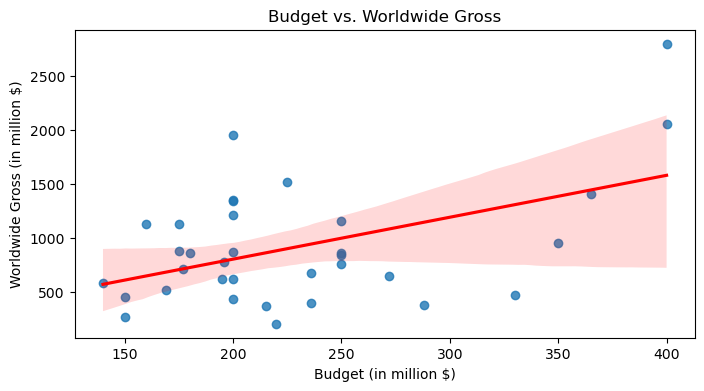

In [10]:
#compare budget vs. worldwide gross using scatterplot
#create plot with a fitted linear regression line
plt.figure(figsize=(8, 4))
sns.regplot(x='Budget (in million $)', y='Worldwide Gross (in million $)', data=df, line_kws={'color': 'red'})
plt.title('Budget vs. Worldwide Gross')
plt.xlabel('Budget (in million $)')
plt.ylabel('Worldwide Gross (in million $)')
#show plot
plt.show()

**Movies with higher budgets tend to have higher worldwide gross, but the relationship is not perfectly linear.**

## Rating Distribution Across Platforms

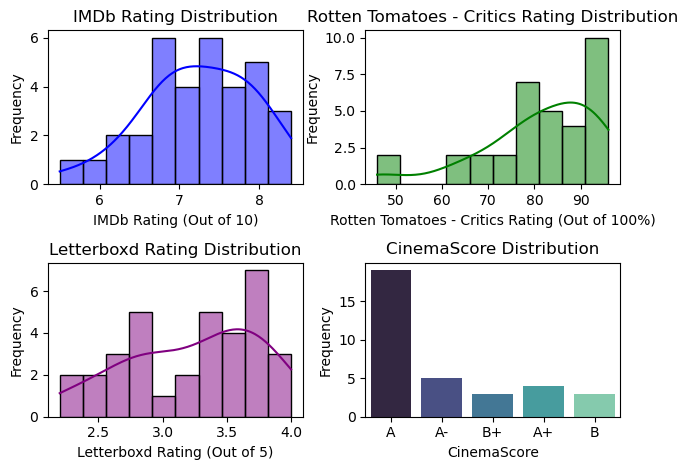

In [11]:
#create subplots for different platforms
#IMDb rating distribution (out of 10)
plt.subplot(2, 2, 1)
sns.histplot(df['IMDb (scored out of 10)'], kde=True, color='blue', bins=10)
plt.title('IMDb Rating Distribution')
plt.xlabel('IMDb Rating (Out of 10)')
plt.ylabel('Frequency')

#Rotten Tomatoes - Critics rating distribution (out of 100%)
plt.subplot(2, 2, 2)
sns.histplot(df['Rotten Tomatoes - Critics (scored out of 100%)'], kde=True, color='green', bins=10)
plt.title('Rotten Tomatoes - Critics Rating Distribution')
plt.xlabel('Rotten Tomatoes - Critics Rating (Out of 100%)')
plt.ylabel('Frequency')

#Letterboxd rating distribution (out of 5)
plt.subplot(2, 2, 3)
sns.histplot(df['Letterboxd (scored out of 5)'], kde=True, color='purple', bins=10)
plt.title('Letterboxd Rating Distribution')
plt.xlabel('Letterboxd Rating (Out of 5)')
plt.ylabel('Frequency')

#CinemaScore distribution (A+ to F grades)
plt.subplot(2, 2, 4)
sns.countplot(x='CinemaScore (grades A+ to F)', data=df, palette='mako')
plt.title('CinemaScore Distribution')
plt.xlabel('CinemaScore')
plt.ylabel('Frequency')

#show the plot
plt.tight_layout()
plt.show()

## Highest Rated Movies

In [12]:
#identify the top 5 highest rated MCU movies
highest_rated = df.sort_values(by='IMDb (scored out of 10)', ascending=False).head(5)
print("\nTop 5 Highest-Rated Movies")
print(highest_rated[['Title', 'IMDb (scored out of 10)']])


Top 5 Highest-Rated Movies
                      Title  IMDb (scored out of 10)
21        Avengers: Endgame                      8.4
18   Avengers: Infinity War                      8.4
26  Spider-Man: No Way Home                      8.2
9   Guardians of the Galaxy                      8.0
5              The Avengers                      8.0


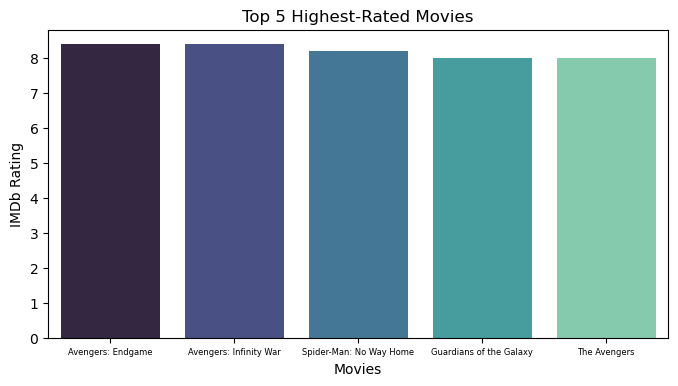

In [13]:
#visualize the highest_rated dataframe
#create barplot
plt.figure(figsize=(8, 4))
sns.barplot(data=highest_rated, x='Title', y='IMDb (scored out of 10)', palette='mako')
#add plot title and axis labels
plt.title('Top 5 Highest-Rated Movies')
plt.xticks(fontsize=6)
plt.xlabel('Movies')
plt.ylabel('IMDb Rating')
#show barplot
plt.show()

## Revenue Trend Over the Years

In [14]:
#extract new column called "Years" from Release Date (DD-MM-YYYY) column
df['Release Year'] = df['Release Date (DD-MM-YYYY)'].dt.year
#check new column
df.head()

,Index,Title,Director (1),Director (2),Release Date (DD-MM-YYYY),IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),CinemaScore (grades A+ to F),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $),Release Year
0,0,Iron Man,Jon Favreau,NaN,2008-05-02,7.9,79,94,91,3.7,A,140.0,319.0,585.8,2008
1,1,The Incredible Hulk,Louis Leterrier,NaN,2008-06-13,6.6,61,68,69,2.5,A-,150.0,134.8,265.5,2008
2,2,Iron Man 2,Jon Favreau,NaN,2010-05-07,6.9,57,72,71,2.9,A,200.0,312.4,623.9,2010
3,3,Thor,Kenneth Branagh,NaN,2011-05-06,7.0,57,77,76,2.8,B+,150.0,181.0,449.3,2011
4,4,Captain America: The First Avenger,Joe Johnston,NaN,2011-07-22,6.9,66,80,75,3.3,A-,215.0,176.7,370.6,2011


In [15]:
#create new dataframe by grouping data by Release Year and summing the Worldwide Gross by year
revenue_trend = df.groupby('Release Year')['Worldwide Gross (in million $)'].sum().reset_index()
print("\nRevenue Trend Over the Years")
print(revenue_trend)


Revenue Trend Over the Years
    Release Year  Worldwide Gross (in million $)
0           2008                           851.3
1           2010                           623.9
2           2011                           819.9
3           2012                          1521.0
4           2013                          1859.8
5           2014                          1487.8
6           2015                          1924.3
7           2016                          1832.8
8           2017                          2614.9
9           2018                          4024.7
10          2019                          5063.0
11          2021                          3166.1
12          2022                          2575.9
13          2023                          1527.8
14          2024                          1338.0


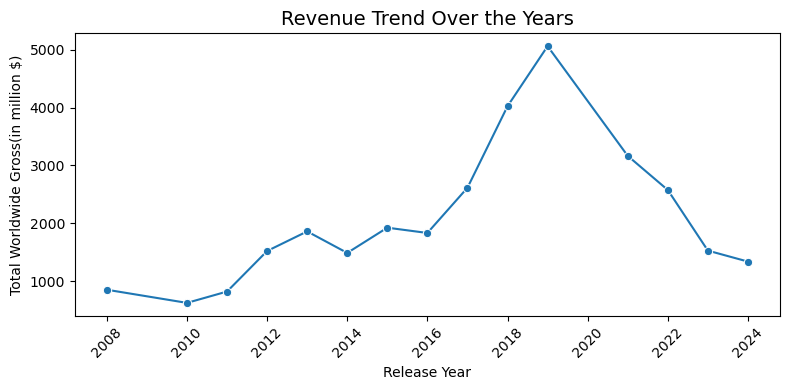

In [16]:
#visualize above dataframe using lineplot
#create lineplot
plt.figure(figsize=(8, 4))
sns.lineplot(x='Release Year', y='Worldwide Gross (in million $)', data=revenue_trend, marker='o')
#add title and labels
plt.title('Revenue Trend Over the Years', fontsize=14)
plt.xlabel('Release Year', fontsize=10)
plt.ylabel('Total Worldwide Gross(in million $)', fontsize=10)
#show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Most Profitable Movies

In [17]:
#calculate profit and profit margin for each movie
df['Profit (in million $)'] = df['Worldwide Gross (in million $)'] - df['Budget (in million $)']
df['Profit Margin (%)'] = (df['Profit (in million $)'] / df['Budget (in million $)']) * 100
#sort in ascending order to dentify the top 5 most profitable movies
most_profitable = df[['Title', 'Profit (in million $)', 'Profit Margin (%)']].sort_values(
    by='Profit (in million $)', ascending=False).head(5)
print('\nTop 5 Most Profitable Movies')
print(most_profitable)


Top 5 Most Profitable Movies
                      Title  Profit (in million $)  Profit Margin (%)
21        Avengers: Endgame                 2399.0             599.75
26  Spider-Man: No Way Home                 1752.0             876.00
18   Avengers: Infinity War                 1652.0             413.00
5              The Avengers                 1296.0             576.00
17            Black Panther                 1150.0             575.00


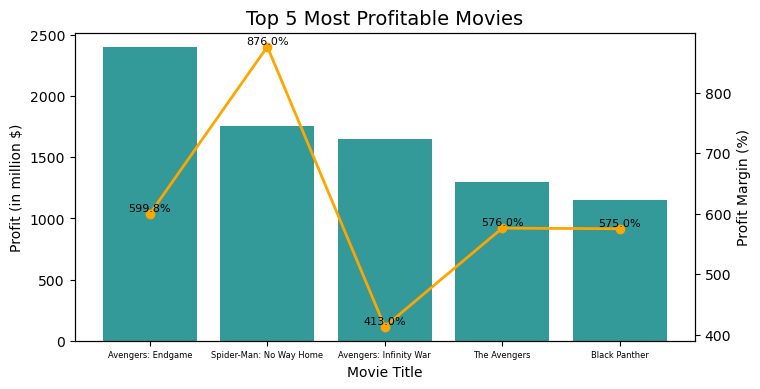

In [18]:
#visualize absolute profit and profit margin using dual-axis combo chart
#create basic line chart
fig, ax1 = plt.subplots(figsize=(8, 4))
#add bars for absolute profit
bars = ax1.bar(most_profitable['Title'], most_profitable['Profit (in million $)'], 
               color='teal', alpha=0.8, label='Profit (in million $)')
#add secondary y-axis for profit margin
ax2 = ax1.twinx()
#add line chart
line = ax2.plot(most_profitable['Title'], most_profitable['Profit Margin (%)'], 
                color='orange', marker='o', linewidth=2, label='Profit Margin (%)')
#add line markers for better readability
for i, value in enumerate(most_profitable['Profit Margin (%)']):
    ax2.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=8)
#add title and axis labels
ax1.set_title('Top 5 Most Profitable Movies', fontsize=14)
ax1.set_xlabel('Movie Title')
ax1.set_ylabel('Profit (in million $)')
ax2.set_ylabel('Profit Margin (%)')
#adjust fontsize for x-axis labels
ax1.tick_params(axis='x', labelsize=6)
#show dual-axis chart
plt.show()
    

## Insights from the Analysis

1. A positive correlation between budget and worldwide gross suggests that higher-budget movies generally perform better at the box office. However, the relationship is not perfectly linear, meaning that some lower-budget films also generated impressive revenue.

2. There's significant variation in audience feedback across platforms, indicating differing expectations between critics and general audiences.

3. The analysis of revenue trends over the years shows an upward trajectory in the worldwide gross, reflecting the growing success and global reach of Marvel movies.This trend may be influenced by the expansion of the Marvel Cinematic Universe (MCU) and increasing global audience engagement.

4. The top 5 most profitable Marvel movies are characterized by large budgets and high box office returns, with **Avengers: Endgame** topping the list.

In [19]:
#save the cleaned and processed dataset
df.to_csv('cleaned_marvel_movies.csv', index=False)

print("\nData analysis completed successfully!")


Data analysis completed successfully!
